In [1]:
import numpy as np
embedding = np.load('../app/data/embedding.npy')
cosine_similarity = np.load('../app/data/cosine_similarity.npy')
isbn_arr = np.load('../app/data/isbn_arr.npy')

In [3]:
from sklearn.cluster import KMeans
import joblib

# K-means 클러스터링 모델을 생성합니다.
# 클러스터의 수는 3으로 설정하고, 재현성을 위해 random_state를 지정합니다.
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(embedding)

# 각 데이터의 클러스터 레이블을 가져옵니다.
labels = kmeans.labels_

# 클러스터링 모델을 파일로 저장합니다.
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [18]:
sample_isbn = np.random.choice(range(1, len(isbn_arr)+1), 5)
sample_isbn

array([1421,  122,  917,  263,  707])

In [42]:
kmeans_model = joblib.load('../app/data/kmeans_model.pkl')
subset_embedding = embedding[sample_isbn]
predict_result = kmeans_model.predict(subset_embedding)
pick_books = np.array([], dtype=int)

for predict in predict_result:
  a = np.argsort(cosine_similarity[sample_isbn[0] - 1]) + 1
  b = np.where(kmeans_model.labels_ == predict)
  result = a[np.isin(a, b)][:10]
  pick_book = np.random.choice(result, 1) 
  pick_books = np.append(pick_books, pick_book)

In [43]:
pick_books

array([ 450,  985,  481, 1348,  440])

(array([4.00000e+01, 6.40000e+01, 2.82000e+02, 8.88000e+02, 2.25800e+03,
        5.16400e+03, 1.04980e+04, 1.99540e+04, 3.42100e+04, 5.39260e+04,
        8.15260e+04, 1.14172e+05, 1.53254e+05, 1.91856e+05, 2.28578e+05,
        2.57084e+05, 2.75388e+05, 2.79162e+05, 2.68884e+05, 2.47588e+05,
        2.16180e+05, 1.83154e+05, 1.49304e+05, 1.16256e+05, 8.77540e+04,
        6.36540e+04, 4.49620e+04, 3.03800e+04, 2.04720e+04, 1.32540e+04,
        8.49600e+03, 4.89000e+03, 2.98200e+03, 1.81600e+03, 9.10000e+02,
        4.72000e+02, 2.48000e+02, 1.30000e+02, 4.80000e+01, 2.60000e+01,
        1.20000e+01, 4.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.78100e+03]),
 array([0.11957773, 0.13718617, 0.15479462, 0.17240307, 0.19001151,
        0.20761996, 0.2252284 , 0.24283685, 0.26044529, 0.27805374,
        0.29566218, 0.31327063, 0.33087907, 0.34848752, 0.36609596,
        0.38370441, 0.40131286, 0.4189213 , 0.43652975, 0.454138

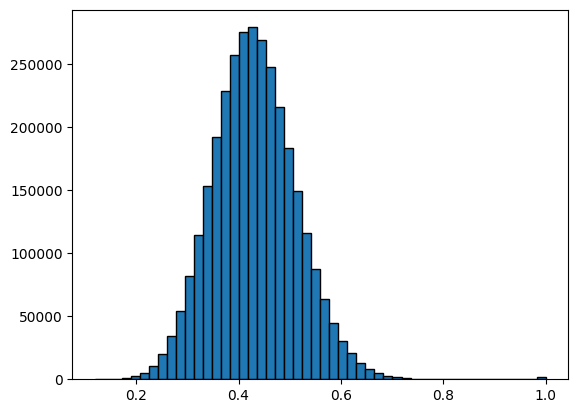

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(cosine_similarity.flatten(), bins=50, edgecolor='black')


In [4]:
def to_zero_index(indices):
    # 1-indexed 리스트나 배열을 0-indexed로 변환
    return np.array(indices) - 1

def to_one_index(indices):
    # 0-indexed 리스트나 배열을 1-indexed로 변환
    return np.array(indices) + 1

In [72]:
# 1-indexed 값을 0-indexed로 변환해서 cosine_similarity 접근
selected_book_indices = [100, 200, 300, 400, 500]
selected_zero_indices = to_zero_index(selected_book_indices)
average_similarity = cosine_similarity[selected_zero_indices, :].mean(axis=0)  # 열 방향 평균

ranked_indices = to_one_index(np.argsort(-average_similarity))  # 이 값은 0-index 기준
# 0-index 기준으로 선택된 인덱스를 제외한 후, 상위 1000개 선택
remove_selected_indices = ranked_indices[~np.isin(ranked_indices, selected_book_indices)]
book_a = remove_selected_indices[0]
book_b = np.argmin(cosine_similarity[remove_selected_indices[0]-1]) + 1
recommended_books = [book_a, book_b]

In [73]:
recommended_books

[424, 1470]

In [60]:
remove_selected_indices[0]

71

921

In [39]:
np.delete(ranked_indices, selected_book_indices)

array([ 100,  200,  300, ...,  401, 1363, 1171])

In [32]:
~np.isin(ranked_indices, selected_zero_indices)

array([ True,  True,  True, ...,  True,  True,  True])

In [20]:
selected_book_indices = [3, 7, 12]

average_similarity = cosine_similarity[selected_book_indices, :].mean(axis=0)  # 열 방향 평균

ranked_indices = np.argsort(-average_similarity)
new_arr = ranked_indices[~np.isin(ranked_indices, selected_book_indices)] 

array([1148, 1493,  542, ...,   49, 1170, 1159])

In [30]:
isbn_arr[new_arr]

array([9788965746553, 9788965744474, 9788946421851, ..., 9791193712559,
       9791165793197, 9791194021162])

In [63]:
import json

# JSON 파일 경로
file_path = "../app/data/book_embeddings_openai.json"

# JSON 파일 불러오기
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)  # JSON을 파이썬 딕셔너리/리스트로 변환


In [64]:
book_idx = data.keys()

In [65]:
import numpy as np
embedding_list = []
isbn_list = []
for idx in book_idx:
  embedding_list.append(data[idx]['embedding'])
  isbn_list.append(data[idx]['isbn'])
embedding_arr = np.array(embedding_list)
isbn_arr = np.array(isbn_list)

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(embedding_arr)
tt = np.load('../app/data/embedding.npy')
tt
# np.save('../app/data/cosine_similarity.npy', cos_sim)

array([[ 0.00338203, -0.03788321, -0.00417405, ..., -0.00620827,
         0.0055552 ,  0.00332645],
       [-0.03128926, -0.03648065, -0.0055966 , ..., -0.01528053,
         0.01984942, -0.00700015],
       [ 0.01781042, -0.03917333, -0.00900722, ..., -0.01607019,
        -0.00865318, -0.03048415],
       ...,
       [ 0.01106439, -0.01899303, -0.01854667, ..., -0.00160693,
        -0.00941282,  0.00023853],
       [-0.01570408, -0.03955854, -0.01143211, ..., -0.00743944,
         0.00875341,  0.01104491],
       [ 0.00264323, -0.06739004, -0.01430079, ..., -0.00190428,
         0.00519138, -0.01661704]])

In [7]:
random_idx = np.random.choice(len(embedding_arr), 1)[0]

In [8]:
sorted_indices = np.argsort(-cos_sim[random_idx])

In [62]:
tt = np.load('../app/data/cosine_similarity.npy')
tt.shape

(1781, 3072)

In [10]:
top_indices

array([990, 136, 779, ..., 315, 477, 110])

In [9]:
num_keep = int(len(sorted_indices) * 0.57)
top_indices = sorted_indices[:num_keep]

    
embedding_arr[top_indices]

array([[ 0.00327518, -0.03155633, -0.01167937, ...,  0.0026072 ,
         0.02479111, -0.00276559],
       [ 0.03014638,  0.00733174, -0.00583844, ...,  0.00291922,
         0.02046418,  0.00887356],
       [ 0.01239837, -0.01558084,  0.00086606, ..., -0.01106129,
         0.00761361, -0.00801142],
       ...,
       [ 0.00699306, -0.02939214, -0.01122321, ...,  0.00055391,
         0.00717055, -0.00884486],
       [-0.02110352, -0.01703373, -0.00415019, ...,  0.00993944,
         0.00838698, -0.00072134],
       [ 0.01689591, -0.00233577, -0.01024402, ..., -0.00593522,
         0.00803843,  0.01581944]])

In [54]:
np.random.choice(len(embedding_arr), 1)[0]

4

In [56]:
len(embedding_arr)

5

In [60]:
np.random.choice(len(embedding_arr), 1)

array([3])

In [12]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def filter_top_70_percent(embedding_arr, original_indices):
    """
    현재 벡터들에서 코사인 유사도를 기반으로 상위 70% 벡터만 남기는 함수
    """
    cos_sim = cosine_similarity(embedding_arr)
    
    # ✅ 랜덤으로 벡터 하나 선택 (현재 남아있는 벡터 중)
    random_idx = np.random.choice(len(embedding_arr), 1)[0]

    # ✅ 선택된 벡터와 유사한 순서대로 정렬
    sorted_indices = np.argsort(-cos_sim[random_idx])

    # ✅ 상위 70% 벡터만 선택
    num_keep = int(len(sorted_indices) * 0.57)
    top_indices = sorted_indices[:num_keep]

    # ✅ 벡터와 인덱스 업데이트
    return embedding_arr[top_indices], original_indices[top_indices]

# ✅ 초기 데이터 설정
embedding_arr = np.array(embedding_list)
original_indices = np.arange(len(embedding_arr))

# ✅ 10번 반복하여 상위 70% 유지
for round_num in range(10):
    print(f"\n🔹 {round_num+1}번째 라운드: 현재 벡터 개수 = {len(embedding_arr)}")
    
    embedding_arr, original_indices = filter_top_70_percent(embedding_arr, original_indices)

print(f"\n✅ 최종 남은 벡터 개수: {len(embedding_arr)}")
print(f"✅ 최종 선택된 원본 벡터 인덱스: {original_indices}")



🔹 1번째 라운드: 현재 벡터 개수 = 1781
1781

🔹 2번째 라운드: 현재 벡터 개수 = 1015
1015

🔹 3번째 라운드: 현재 벡터 개수 = 578
578

🔹 4번째 라운드: 현재 벡터 개수 = 329
329

🔹 5번째 라운드: 현재 벡터 개수 = 187
187

🔹 6번째 라운드: 현재 벡터 개수 = 106
106

🔹 7번째 라운드: 현재 벡터 개수 = 60
60

🔹 8번째 라운드: 현재 벡터 개수 = 34
34

🔹 9번째 라운드: 현재 벡터 개수 = 19
19

🔹 10번째 라운드: 현재 벡터 개수 = 10
10

✅ 최종 남은 벡터 개수: 5
✅ 최종 선택된 원본 벡터 인덱스: [1189  212 1225  877 1324]
